In [1]:
import Titanic_feature_modeling as tfm
import pickle
from pandas import read_csv

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
x = tfm.modeling('test.csv')
x.dropna(inplace = True)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 9 columns):
SibSp           417 non-null float64
Fare            417 non-null float64
Age             417 non-null float64
Cabin_A         417 non-null int64
Cabin_C         417 non-null int64
Cabin_F         417 non-null int64
Cabin_G         417 non-null int64
Title_Master    417 non-null uint8
Sex             417 non-null int64
dtypes: float64(3), int64(5), uint8(1)
memory usage: 29.7 KB


In [3]:
file = open('trained_model','rb')
logistic_regression = pickle.load(file)
file.close();

In [4]:
y = logistic_regression.predict(x)

In [5]:
x['Survived'] = y

In [6]:
survived = x[x['Survived'] == 1]
not_survived = x[x['Survived'] == 0]

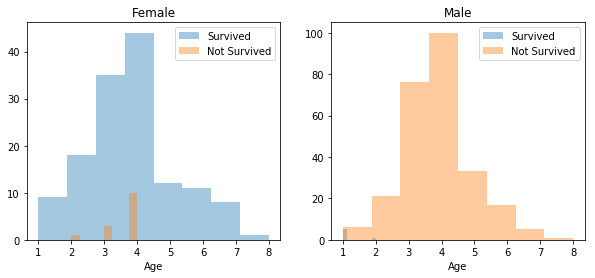

In [7]:
women_surv = survived[survived['Sex'] == -1]
men_surv   = survived[survived['Sex'] == 1]

women_no_surv = not_survived[not_survived['Sex'] == -1]
men_no_surv   = not_survived[not_survived['Sex'] == 1]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax = sbn.distplot(8*women_surv['Age'].dropna(), 
                  bins = 8, 
                  label = 'Survived', 
                  ax = axes[0], kde = False)
ax = sbn.distplot(8*women_no_surv['Age'].dropna(), 
                  bins=8, 
                  label = 'Not Survived', 
                  ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')

ax = sbn.distplot(8*men_surv['Age'].dropna(), 
                  bins = 8, 
                  label = 'Survived', 
                  ax = axes[1], kde = False)
ax = sbn.distplot(8*men_no_surv['Age'].dropna(), 
                  bins = 8, 
                  label = 'Not Survived', 
                  ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

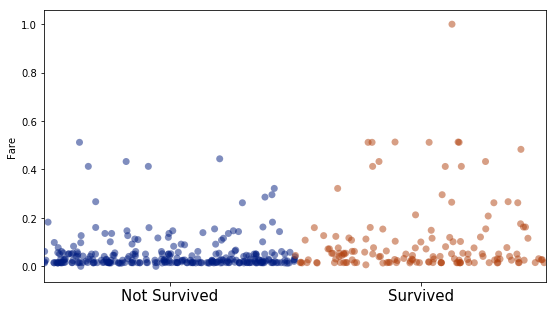

In [8]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(9, 5))
sbn.stripplot(x = 'Survived', 
              y = 'Fare',
              data    = x,
              palette = 'dark',
              size    = 7,
              alpha   = 0.5,
              jitter  = 0.5
             )
ax1.set_xticklabels(['Not Survived', 'Survived'], 
                    fontsize=15, 
                    rotation='horizontal')
ax1.set_xlabel(' ');

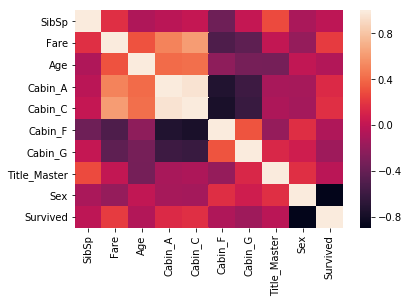

In [9]:
sbn.heatmap(x.corr())

In [10]:
def swarm_plot(x_feat, y_feat, hue_feat, axis):
    sbn.swarmplot(x = x_feat,
                  y = y_feat,
                  data    = x,
                  hue     = hue_feat,
                  palette = 'rocket',
                  size    = 7,
                  ax = axis
                 );

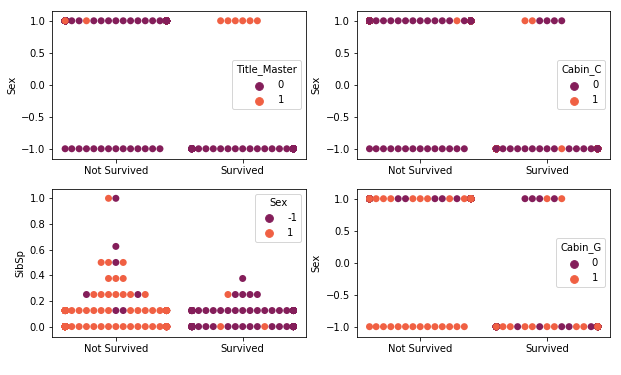

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

swarm_plot('Survived', 'Sex', 'Title_Master', axs[0][0]);
axs[0][0].set_xticklabels(['Not Survived', 'Survived'], rotation='horizontal')
axs[0][0].set_xlabel(' ')

swarm_plot('Survived', 'Sex', 'Cabin_C', axs[0][1]);
axs[0][1].set_xticklabels(['Not Survived', 'Survived'], rotation='horizontal')
axs[0][1].set_xlabel(' ')

swarm_plot('Survived', 'Sex', 'Cabin_G', axs[1][1]);
axs[1][1].set_xticklabels(['Not Survived', 'Survived'], rotation='horizontal')
axs[1][1].set_xlabel(' ')

swarm_plot('Survived', 'SibSp', 'Sex', axs[1][0]);
axs[1][0].set_xticklabels(['Not Survived', 'Survived'], rotation='horizontal')
axs[1][0].set_xlabel(' ');